# Income Dataset

### Problem Statement : Perform Binary Classification to predict if Salary is greater than dollars 50k

#### The dataset provided predictive feature like education , employment status , marital status to predict if the salary is greater than dollars 50K

#### It can be used to practice machine learning problem like classification.

In [236]:
#importing librarirs

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
import random
#Rest of the libraries will be imported wereever necessary

In [121]:
df_train=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\Income Dataset\\train.csv')
df_test=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\Income Dataset\\train.csv')

In [122]:
df_train.shape,df_test.shape

((43957, 15), (43957, 15))

In [123]:
#merging train and test dataframes for data preprocessing 

In [124]:
df=pd.concat([df_train,df_test])

In [125]:
df.shape#87914 records and 15 columns

(87914, 15)

In [126]:
df.head()#first 5 observations

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [127]:
df.tail()#last 5 observations

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87914 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              87914 non-null  int64 
 1   workclass        82918 non-null  object
 2   fnlwgt           87914 non-null  int64 
 3   education        87914 non-null  object
 4   educational-num  87914 non-null  int64 
 5   marital-status   87914 non-null  object
 6   occupation       82902 non-null  object
 7   relationship     87914 non-null  object
 8   race             87914 non-null  object
 9   gender           87914 non-null  object
 10  capital-gain     87914 non-null  int64 
 11  capital-loss     87914 non-null  int64 
 12  hours-per-week   87914 non-null  int64 
 13  native-country   86388 non-null  object
 14  income_>50K      87914 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 10.7+ MB


In [129]:
df_num=df.select_dtypes(include=np.number)
len(df_num.columns)#total numeric columns

7

In [130]:
df_num.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K'],
      dtype='object')

In [131]:
df_cat=df.select_dtypes(include='object')
len(df_cat.columns)#total categorical columns

8

In [132]:
df_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [133]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,87914.000000,8.791400e+04,87914.000000,87914.000000,87914.000000,87914.000000,87914.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734323,1.058209e+05,2.575077,7570.493006,404.586109,12.400232,0.426646
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [134]:
for i in df.columns:
    Total=(df[i].value_counts()/len(df))*100
    print(Total)##% observations in each category.
    print()

33    2.759515
36    2.757240
31    2.718566
23    2.716291
35    2.714016
        ...   
88    0.013650
85    0.009100
87    0.004550
89    0.004550
86    0.002275
Name: age, Length: 74, dtype: float64

Private             69.583912
Self-emp-not-inc     7.880429
Local-gov            6.419910
State-gov            3.994813
Self-emp-inc         3.453375
Federal-gov          2.921036
Without-pay          0.045499
Never-worked         0.018200
Name: workclass, dtype: float64

203488    0.043224
125892    0.040949
126569    0.040949
190290    0.038674
120277    0.038674
            ...   
186369    0.002275
94196     0.002275
348144    0.002275
114670    0.002275
145401    0.002275
Name: fnlwgt, Length: 26646, dtype: float64

HS-grad         32.297473
Some-college    22.271766
Bachelors       16.422868
Masters          5.441682
Assoc-voc        4.165434
11th             3.746844
Assoc-acdm       3.291853
10th             2.843688
7th-8th          1.961007
Prof-school      1.701663
9th      

In [135]:
df.isnull().sum()#checking for missing values

age                   0
workclass          4996
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         5012
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country     1526
income_>50K           0
dtype: int64

In [136]:
(df.isnull().sum()/len(df))*100#percentage of missing values

age                0.000000
workclass          5.682826
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.701026
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.735787
income_>50K        0.000000
dtype: float64

In [137]:
df=df.dropna()
#droping null values records

In [138]:
df.shape#null values have been dropped

(81454, 15)

In [139]:
#we can see education column and educational-num are same we can drop the of education going ahead

In [140]:
df=df.drop('education',axis=1)
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [141]:
#categorical plots

In [142]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


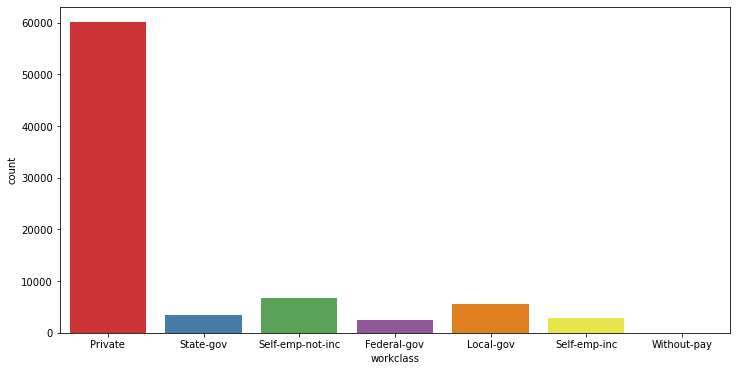

In [143]:
plt.figure(figsize=(12,6))
sns.countplot(df['workclass'],palette="Set1")
plt.show()

In [144]:
#working class in private is more as compared to others

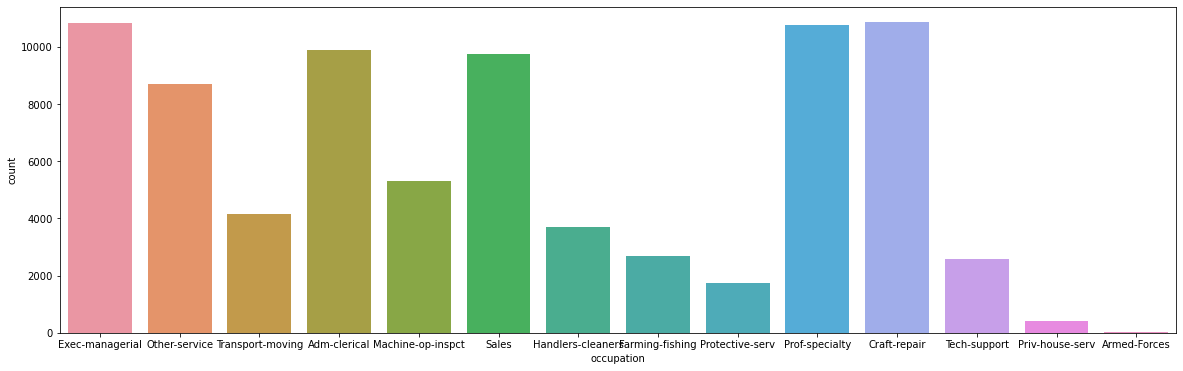

In [145]:
plt.figure(figsize=(20,6))
sns.countplot(df['occupation'])
plt.show()

In [146]:
#occupation for Craft-repair,Exec-managerial,Prof-specialty is more as compared to others

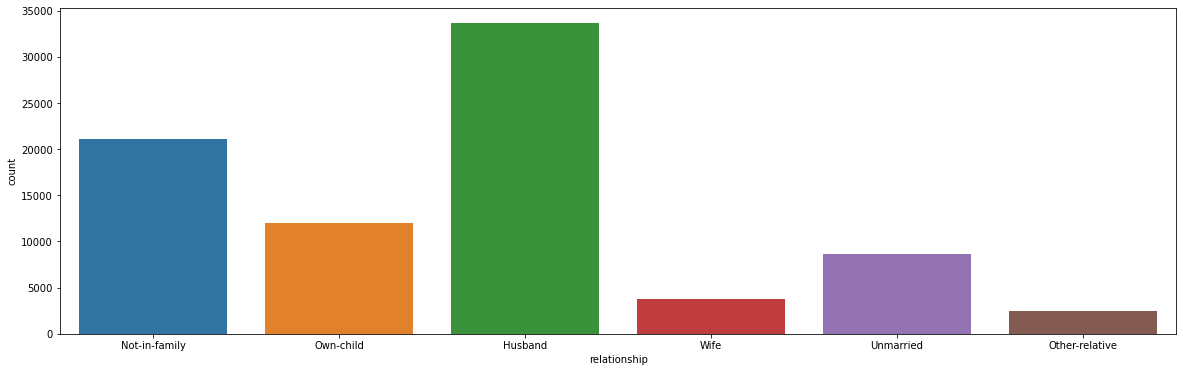

In [147]:
plt.figure(figsize=(20,6))
sns.countplot(df['relationship'])
plt.show()

In [148]:
#in relation ship status husband has more weitage with respect to the others

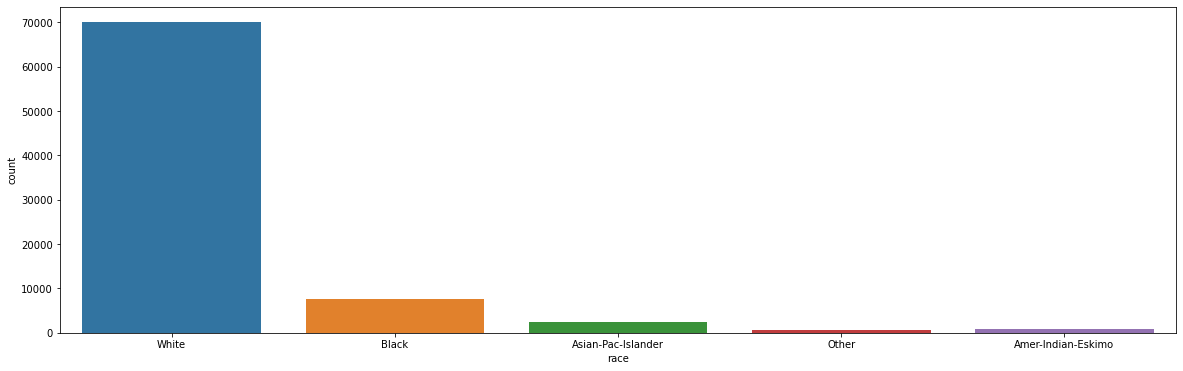

In [149]:
plt.figure(figsize=(20,6))
sns.countplot(df['race'])
plt.show()

In [150]:
#with race is more dominant with respect to the other race

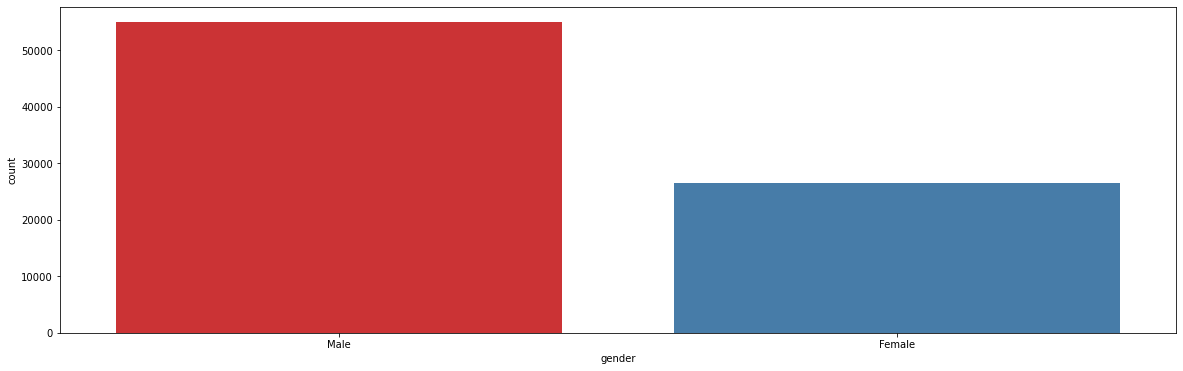

In [151]:
plt.figure(figsize=(20,6))
sns.countplot(df['gender'],palette="Set1")
plt.show()

In [152]:
#gender male is more dominant than female

In [153]:
df['native-country'].sort_values(ascending=False).value_counts().head()

United-States    74336
Mexico            1676
Philippines        522
Germany            352
Puerto-Rico        318
Name: native-country, dtype: int64

In [154]:
#United-States has the most records with respect to the other countries

In [155]:
df.cov()#covariance

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,175.380486,-1.051522e+05,1.380213,7.966544e+03,320.078322,16.195087,1.358465
fnlwgt,-105152.221534,1.121512e+10,-12050.839518,-2.873392e+06,-295330.587665,-21731.973348,-340.960990
educational-num,1.380213,-1.205084e+04,6.538599,2.517997e+03,84.204303,4.564158,0.369205
capital-gain,7966.544059,-2.873392e+06,2517.997165,5.836646e+07,-99832.513868,7770.794439,731.152264
capital-loss,320.078322,-2.953306e+05,84.204303,-9.983251e+04,165296.236337,268.613963,25.541824
hours-per-week,16.195087,-2.173197e+04,4.564158,7.770794e+03,268.613963,144.346280,1.182222
income_>50K,1.358465,-3.409610e+02,0.369205,7.311523e+02,25.541824,1.182222,0.186396


In [156]:
df.corr()#corealtion plot

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,1.000000,-0.074977,0.040758,0.078740,0.059448,0.101786,0.237597
fnlwgt,-0.074977,1.000000,-0.044501,-0.003551,-0.006859,-0.017080,-0.007457
educational-num,0.040758,-0.044501,1.000000,0.128894,0.080995,0.148565,0.334432
capital-gain,0.078740,-0.003551,0.128894,1.000000,-0.032141,0.084661,0.221671
capital-loss,0.059448,-0.006859,0.080995,-0.032141,1.000000,0.054991,0.145513
hours-per-week,0.101786,-0.017080,0.148565,0.084661,0.054991,1.000000,0.227918
income_>50K,0.237597,-0.007457,0.334432,0.221671,0.145513,0.227918,1.000000


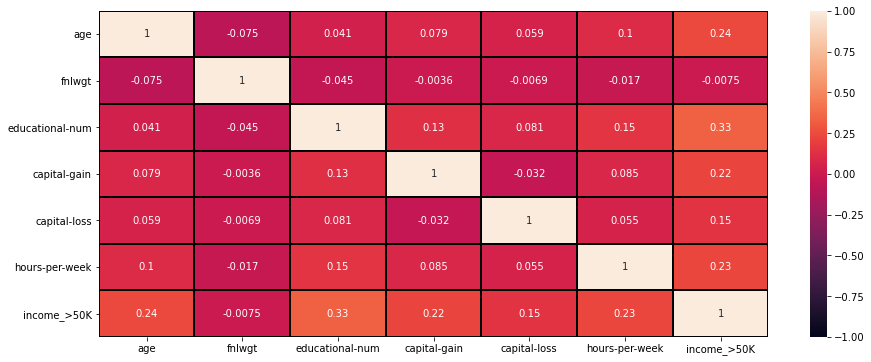

In [157]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True,linecolor='black',linewidths=1)
plt.show()

In [158]:
#With the target variable income_>50K, educational-num has the highest positve corealtion with repect to others

#fnlwgt has negative corealtion will all the variables

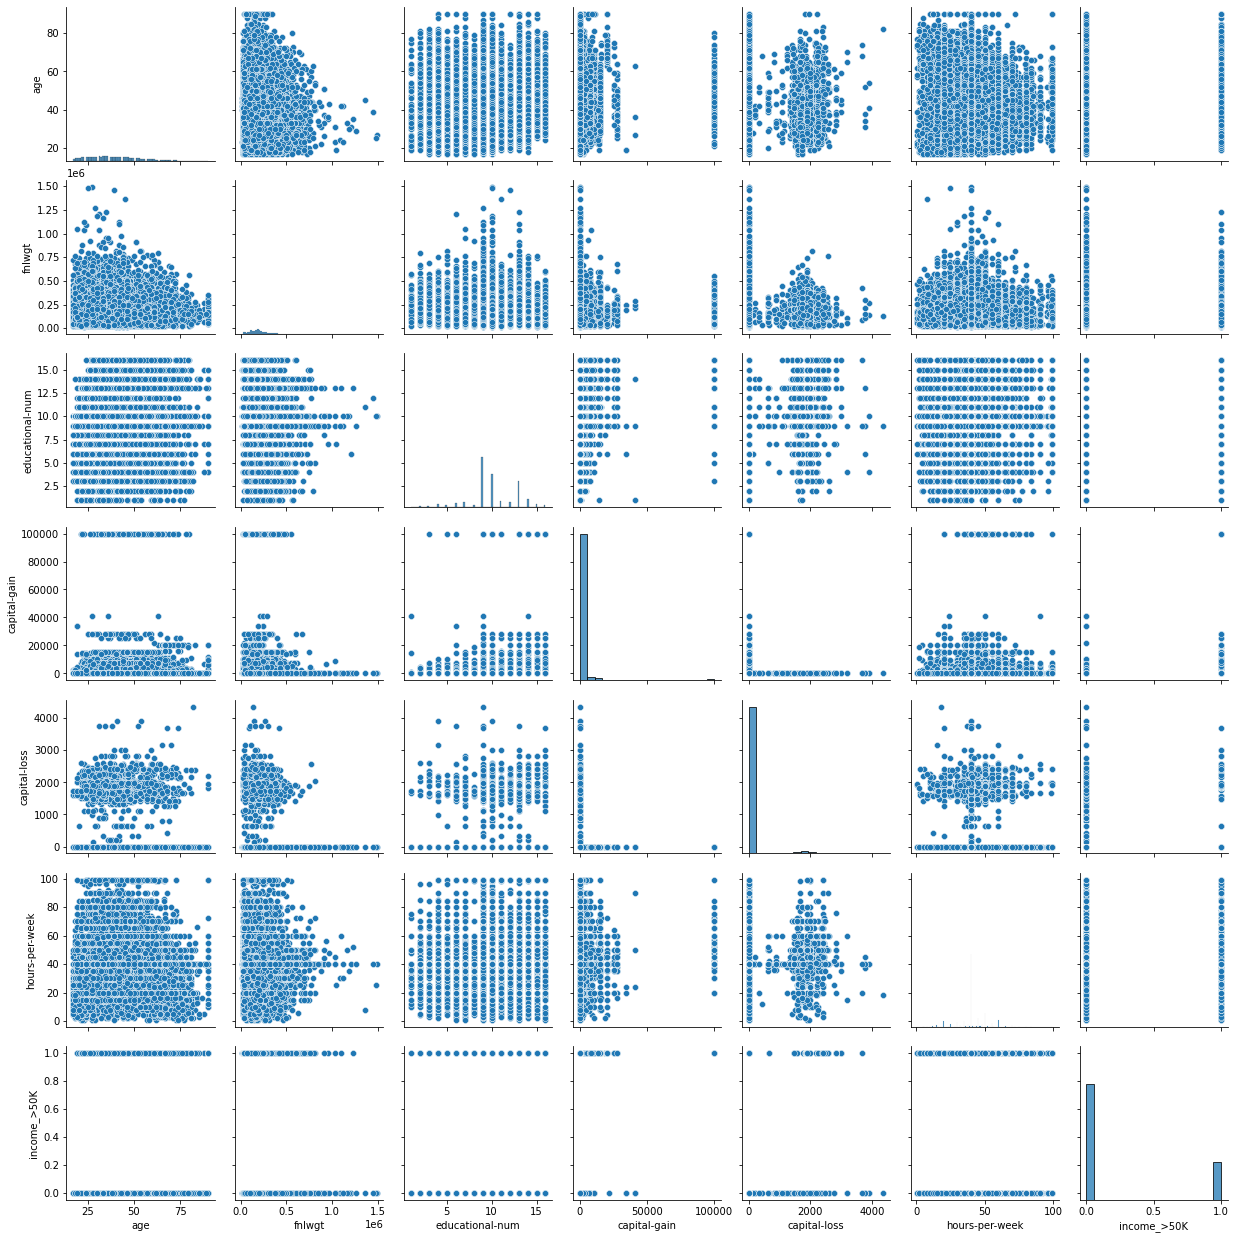

In [166]:
sns.pairplot(df)

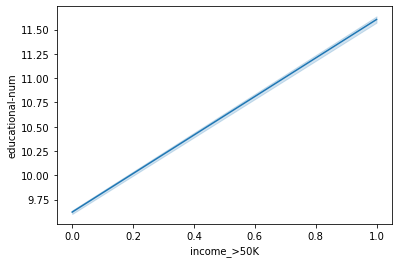

In [159]:
sns.lineplot(x=df['income_>50K'],y=df['educational-num'])
plt.show()

In [160]:
#with increase in education-number income also increases

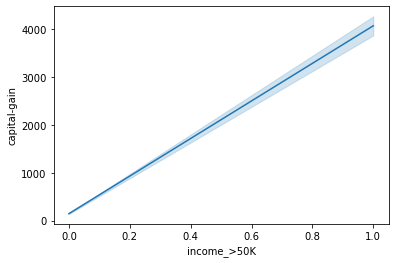

In [161]:
sns.lineplot(x=df['income_>50K'],y=df['capital-gain'])
plt.show()

In [162]:
#with increase in income ,capital gain also increases

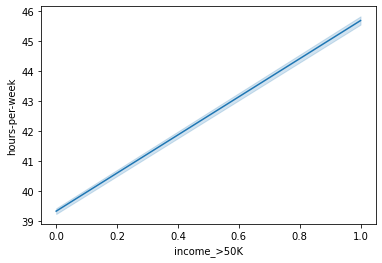

In [163]:
sns.lineplot(x=df['income_>50K'],y=df['hours-per-week'])
plt.show()

In [164]:
#with increase in hours per week , income also increases

In [167]:
#checkin for outliers

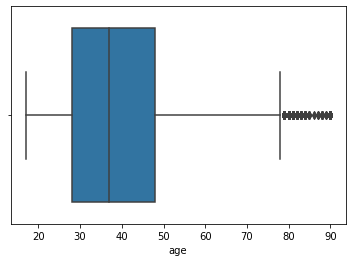

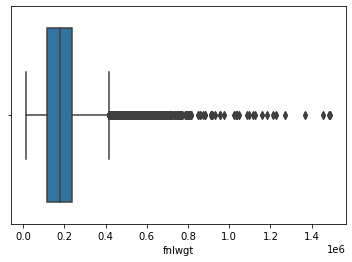

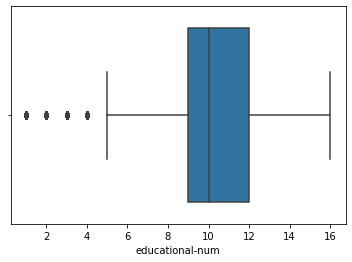

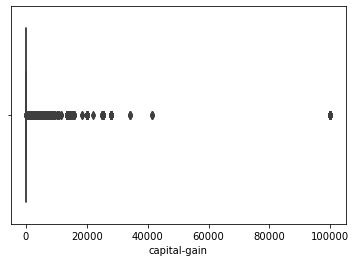

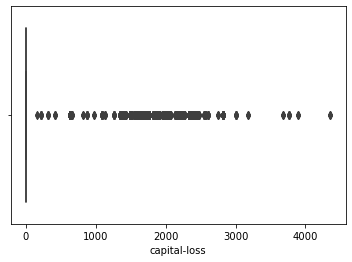

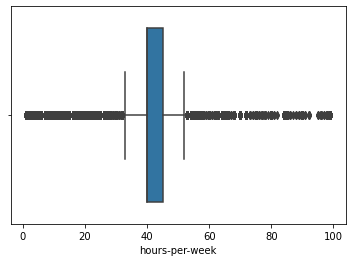

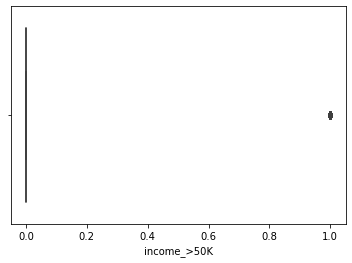

In [168]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [169]:
#We will perform analysis without removing the outliers

In [170]:
#Encoding

In [171]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [172]:
df1=df.copy()#making a copy

In [173]:
X=df1.drop('income_>50K',axis=1)
Y=df1['income_>50K']

In [174]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()
X['workclass']=Label_Encoder.fit_transform(X['workclass'])
X['marital-status']=Label_Encoder.fit_transform(X['marital-status'])
X['occupation']=Label_Encoder.fit_transform(X['occupation'])
X['relationship']=Label_Encoder.fit_transform(X['relationship'])
X['race']=Label_Encoder.fit_transform(X['race'])
X['gender']=Label_Encoder.fit_transform(X['gender'])
X['native-country']=Label_Encoder.fit_transform(X['native-country'])

In [175]:
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,67,2,366425,16,0,3,1,4,1,99999,0,60,38
1,17,2,244602,8,4,7,3,4,1,0,0,15,38
2,31,2,174201,13,2,3,0,4,1,0,0,40,38
3,58,5,110199,4,2,13,0,4,1,0,0,40,38
4,25,5,149248,10,4,7,1,2,1,0,0,40,38


In [176]:
#Scaling

In [177]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X1=Scaler.fit_transform(X)
X2=pd.DataFrame(X1,columns=X.columns)

In [178]:
X2.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,2.150468,-0.211157,1.667967,2.302060,-1.723735,-0.738941,-0.258360,0.385159,0.693917,12.942883,-0.219507,1.589062,0.264031
1,-1.625098,-0.211157,0.517617,-0.826542,0.943839,0.255174,0.993914,0.385159,0.693917,-0.146424,-0.219507,-2.156461,0.264031
2,-0.567940,-0.211157,-0.147165,1.128834,-0.389948,-0.738941,-0.884497,0.385159,0.693917,-0.146424,-0.219507,-0.075615,0.264031
3,1.470866,2.932806,-0.751523,-2.390843,-0.389948,1.746347,-0.884497,0.385159,0.693917,-0.146424,-0.219507,-0.075615,0.264031
4,-1.021007,2.932806,-0.382791,-0.044392,0.943839,0.255174,-0.258360,-2.012086,0.693917,-0.146424,-0.219507,-0.075615,0.264031


In [179]:
#let
X=X2#assigning

In [180]:
Y.value_counts()

0    61270
1    20184
Name: income_>50K, dtype: int64

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:
sm=SMOTE(random_state=42)
X1,Y1=sm.fit_resample(X,Y)
Y1.value_counts()

0    61270
1    61270
Name: income_>50K, dtype: int64

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test=train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [185]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(85778, 13)
(36762, 13)
(85778,)
(36762,)


In [186]:
#Modelling

In [187]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [188]:
#1. KNeighborsClassifier

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
KNN=KNeighborsClassifier(n_neighbors=5)
K_Neighbors_Classifier=KNN.fit(x_train,y_train)

In [191]:
knn_pred=K_Neighbors_Classifier.predict(x_test)

In [192]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89     15705
           1       0.97      0.85      0.90     21057

    accuracy                           0.90     36762
   macro avg       0.90      0.91      0.90     36762
weighted avg       0.91      0.90      0.90     36762



In [193]:
confusion_matrix(knn_pred,y_test)

array([[15151,   554],
       [ 3225, 17832]], dtype=int64)

In [194]:
accuracy_score(knn_pred,y_test)*100

89.72036341874762

In [71]:
#Inference:

#Accuracy of the model is almost 89.72 almost 90

#Precison of the model is high amlost 0.90

#TPR(true positive rate) ie, Recall is also high 0.91

In [72]:
#ROC curve

In [73]:
import sklearn.metrics as metrics

In [74]:
fpr1,tpr1, threshold1=metrics.roc_curve(knn_pred,y_test)#Compute Receiver operating characteristic (ROC)
roc_auc1=metrics.auc(fpr1,tpr1)#compute area under the curve

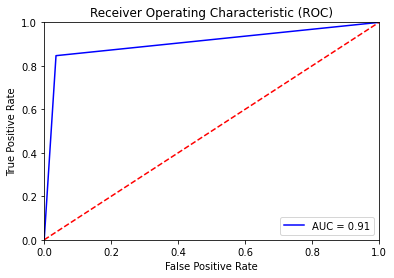

In [75]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr1, tpr1, 'b',label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (KNeighborsClassifier) is away from the red dotted line; 
#with the AUC score 0.91.

In [77]:
#let check is model is underfitted or overfitted

In [78]:
knn_pred_train=K_Neighbors_Classifier.predict(x_train)

In [79]:
print(classification_report(knn_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     37549
           1       0.99      0.88      0.93     48229

    accuracy                           0.93     85778
   macro avg       0.93      0.93      0.93     85778
weighted avg       0.93      0.93      0.93     85778



In [80]:
confusion_matrix(knn_pred_train,y_train)

array([[37029,   520],
       [ 5865, 42364]], dtype=int64)

In [81]:
accuracy_score(knn_pred_train,y_train)*100

92.55636643428386

In [82]:
#As per train and test accuracy overfitting in model is less

In [83]:
#2. Decission Tree classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dtc=DecisionTreeClassifier(max_depth=5)
Decision_Tree_Classifier=dtc.fit(x_train,y_train)

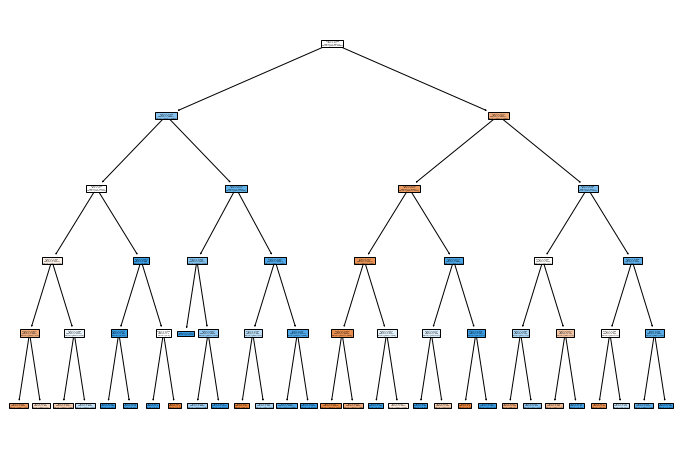

In [86]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(Decision_Tree_Classifier,filled=True)
plt.show()

In [87]:
dtc_pred=Decision_Tree_Classifier.predict(x_test)

In [88]:
print(classification_report(dtc_pred,y_test))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     17089
           1       0.85      0.80      0.82     19673

    accuracy                           0.82     36762
   macro avg       0.82      0.82      0.82     36762
weighted avg       0.82      0.82      0.82     36762



In [89]:
confusion_matrix(dtc_pred,y_test)

array([[14381,  2708],
       [ 3995, 15678]], dtype=int64)

In [90]:
accuracy_score(dtc_pred,y_test)*100

81.76649801425386

In [91]:
#Inference:

#Accuracy of the model is almost 81.76

#Precison of the model is high amlost 0.82

#TPR(true positive rate) ie, Recall is also high 0.82

In [92]:
#ROC curve

In [93]:
fpr2,tpr2,threshold2=metrics.roc_curve(dtc_pred,y_test)#Compute Receiver operating characteristic (ROC)
roc_auc2=metrics.auc(fpr2,tpr2)#compute area under the curve

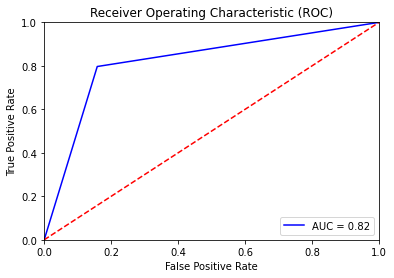

In [94]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr2, tpr2, 'b',label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc='lower right')
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (DecisionTreeClassifier) is away from the red dotted line; 
#with the AUC score 0.82.

In [96]:
#let check is model is underfitted or overfitted

In [97]:
dtc_pred_train=Decision_Tree_Classifier.predict(x_train)

In [98]:
print(classification_report(dtc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     39597
           1       0.86      0.80      0.83     46181

    accuracy                           0.82     85778
   macro avg       0.82      0.82      0.82     85778
weighted avg       0.82      0.82      0.82     85778



In [99]:
confusion_matrix(dtc_pred_train,y_train)

array([[33475,  6122],
       [ 9419, 36762]], dtype=int64)

In [100]:
accuracy_score(dtc_pred_train,y_train)*100

81.88230082305486

In [101]:
#As per train and test accuracy there is no overfitting in the model

In [102]:
#3. Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rfc=RandomForestClassifier()
Random_Forest_Classifier=rfc.fit(x_train,y_train)

In [105]:
rfc_pred=Random_Forest_Classifier.predict(x_test)

In [106]:
print(classification_report(rfc_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     18158
           1       0.98      0.97      0.97     18604

    accuracy                           0.97     36762
   macro avg       0.97      0.97      0.97     36762
weighted avg       0.97      0.97      0.97     36762



In [107]:
confusion_matrix(rfc_pred,y_test)

array([[17767,   391],
       [  609, 17995]], dtype=int64)

In [108]:
accuracy_score(rfc_pred,y_test)*100

97.27979979326479

In [109]:
#Inference:

#Accuracy of the model is almost 97.19

#Precison of the model is high amlost 0.97

#TPR(true positive rate) ie, Recall is also high 0.97

In [110]:
#Roc curve

In [111]:
fpr3,tpr3,threshold3=metrics.roc_curve(rfc_pred,y_test)##Compute Receiver operating characteristic (ROC)
roc_auc3=metrics.auc(fpr3,tpr3)#compute Area under the curve

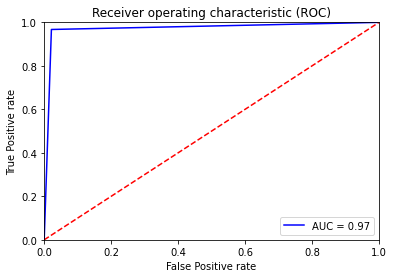

In [112]:
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr3,tpr3,'b',label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [113]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (RandomForestClassifier) is away from the red dotted line; 
#with the AUC score 0.97.

In [114]:
#to check if the model is overfitted

In [115]:
rfc_pred_train=Random_Forest_Classifier.predict(x_train)

In [116]:
print(classification_report(rfc_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42889
           1       1.00      1.00      1.00     42889

    accuracy                           1.00     85778
   macro avg       1.00      1.00      1.00     85778
weighted avg       1.00      1.00      1.00     85778



In [117]:
confusion_matrix(rfc_pred_train,y_train)

array([[42889,     0],
       [    5, 42884]], dtype=int64)

In [118]:
accuracy_score(rfc_pred_train,y_train)*100

99.994170999557

In [119]:
#As per train and test accuracy there is little overfitting

In [195]:
#Tune the Hyperparameters using GridSearchCV (Random Forest)

In [196]:
#4. XGBClassifier

In [197]:
from xgboost import XGBClassifier

In [198]:
xgb=XGBClassifier(max_depth = 10, gamma = 1)
XGB_Classifier=xgb.fit(x_train,y_train)

[12:13:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [199]:
xgb_pred=XGB_Classifier.predict(x_test)

In [200]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     18023
           1       0.94      0.92      0.93     18739

    accuracy                           0.93     36762
   macro avg       0.93      0.93      0.93     36762
weighted avg       0.93      0.93      0.93     36762



In [201]:
confusion_matrix(xgb_pred,y_test)

array([[16956,  1067],
       [ 1420, 17319]], dtype=int64)

In [204]:
accuracy_score(xgb_pred,y_test)*100

93.23486208584953

In [219]:
#Inference:

#Accuracy of the model is almost 93.23

#Precison of the model is high amlost 0.93

#TPR(true positive rate) ie, Recall is also high 0.93

In [ ]:
#Roc Curve

In [210]:
fpr4,tpr4,threshold4=metrics.roc_curve(xgb_pred,y_test)
roc_auc4=metrics.auc(fpr4,tpr4)

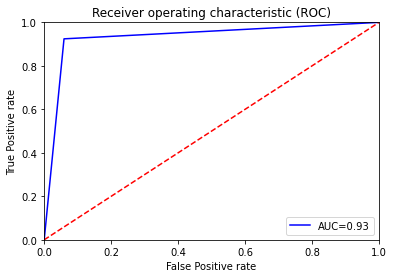

In [211]:
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr4,tpr4,'b',label='AUC=%0.2f' %roc_auc4)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [212]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (XGBClassifier) is away from the red dotted line; 
#with the AUC score 0.93.

In [213]:
#checking if the model is overfitted

In [214]:
xgb_pred_train=XGB_Classifier.predict(x_train)

In [215]:
print(classification_report(xgb_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     42067
           1       0.97      0.95      0.96     43711

    accuracy                           0.96     85778
   macro avg       0.96      0.96      0.96     85778
weighted avg       0.96      0.96      0.96     85778



In [216]:
confusion_matrix(xgb_pred_train,y_train)

array([[40748,  1319],
       [ 2146, 41565]], dtype=int64)

In [218]:
accuracy_score(xgb_pred_train,y_train)*100

95.9605026929982

In [220]:
#Inference:

#Accuracy of the model is almost 95

#Precison of the model is high amlost 0.96

#TPR(true positive rate) ie, Recall is also high 0.96

In [221]:
#As per train and test accuracy there is little overfitting

In [ ]:
#Tune the Hyperparameters (GridSearchCV)

In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(2,5),
                     'gamma': [0, 1, 2, 3, 4]}

In [227]:
xgb_model1 = XGBClassifier()

xgb_grid1 = GridSearchCV(estimator = xgb_model1, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid1.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid1.best_params_, '\n')

[12:27:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [228]:
xgb_model2 = XGBClassifier(max_depth = 4, gamma = 2,learning_rate= 0.6)

# fit the model using fit() on train data
XGBoost2=xgb_model2.fit(x_train, y_train)

[12:44:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [229]:
xgb_preds_3 = XGBoost2.predict(x_test)

In [230]:
print(classification_report(xgb_preds_3,y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     18203
           1       0.90      0.89      0.89     18559

    accuracy                           0.89     36762
   macro avg       0.89      0.89      0.89     36762
weighted avg       0.89      0.89      0.89     36762



In [231]:
confusion_matrix(xgb_preds_3,y_test)

array([[16339,  1864],
       [ 2037, 16522]], dtype=int64)

In [232]:
accuracy_score(xgb_preds_3,y_test)

0.8938849899352592

In [233]:
#Inference:

#Accuracy of the model is almost 59

#Precison of the model is high amlost 0.59

#TPR(true positive rate) ie, Recall is also high 0.89

In [234]:
#feature Importance for XGBoost model

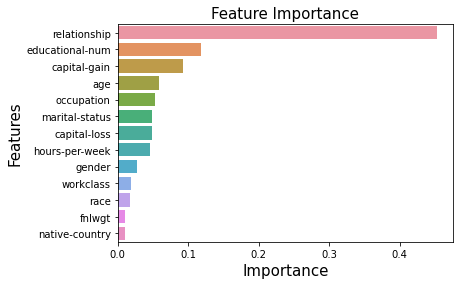

In [235]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': XGBoost2.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [ ]:
#----------------------------------------------------------END------------------------------------------------------------#